## Load data from csv

In [30]:
pool_name_ = "USDC-ETH-0.05"

In [31]:
import pandas as pd
swap_data_ = pd.read_csv(f"./data/pairs/{pool_name_}-swap_data.csv")\
    .rename(columns={"Unnamed: 0": "txnIndex"})\
    .set_index("txnIndex")

sandwich_data_ = pd.read_csv(f"./data/pairs/{pool_name_}-sandwich_data.csv")\
    .rename(columns={"Unnamed: 0": "blockTimestamp"})\
    .set_index("blockTimestamp")

In [33]:
swap_data_.head(3)

,blockTimestamp,blockNumber,logIndex,txnHash,origin,sender,gasUsed,gasPrice,amount0,amount1,...,viaRouter,price0After,price1After,informed,binance_price_token1_pre_block,binance_price_token1_1m_lag,binance_price_token1_5m_lag,binance_price_token1_10m_lag,binance_price_token1_30m_lag,binance_price_token1_60m_lag
txnIndex,,,,,,,,,,,,,,,,,,,,,
0,1.662962e+09,15519277,83,0xe16db8d1af0bf81d18b9c212307407ac1b64a940b955...,0x8993801b6afc20cfeb9d2c0a354e154cd1d79d80,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,209277,6017779198,-3000.000000,1.735737,...,V3 router 2,0.000578,1729.229797,False,1728.28,1727.94,1726.76,1726.82,1728.64,1734.22
1,1.662962e+09,15519278,146,0x61421fbd6ead19667a8fd67cbfd8dcfdf254e0ae14f9...,0x80ff59d3518ca8954c5c2a642fc3d553486a9bbd,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,291757,5543460742,-1296.271610,0.750000,...,V3 router 2,0.000578,1729.223724,False,1728.28,1727.94,1726.76,1726.82,1728.64,1734.22
2,1.662962e+09,15519279,29,0xa8da879d67c880386bd0e82c70484c95e6e429c5ecfe...,0x76681c1f04a475d6800debd9ce81254d88eb63b2,0xe592427a0aece92de3edee1f18e0157c05861564,466151,28932820445,-74468.735932,43.090726,...,V3 router 1,0.000578,1728.874881,False,1728.28,1727.94,1726.76,1726.82,1728.64,1734.22


In [34]:
sandwich_data_.head(3)

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,top_bun_amount0,meat_amount0,bottom_bun_amount0
blockTimestamp,,,,,,,,,,,,
1.662964e+09,15519419,0xb165a4c89abf64e3508a2de641a539fbf2ca390423e8...,0xc282d41afa7d7a9e31573d394edfa46d6b68d3824b06...,0xa2c3ec9c55fe240527d4e6a37f2080ba2d67598c396b...,2.601747,11.059424,-8.457678,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,2687.460820,33959.201312,-46667.385465
1.662964e+09,15519434,0xd27a35ad1cb05cb44c36a5f694bfaa739d5baaf48367...,0xac2976febd748f499a99b95330ed66c42b8955f1412c...,0xa4eed504b693b3e690d0065e35960f8ea8dbe0273a6e...,0.138271,6.864437,-6.726166,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x0eae044f00b0af300500f090ea00027097d03000,-138.413598,-1318.984762,1281.558842
1.662966e+09,15519538,0xf6e7a334ab5d2a060708a280266441a6c0da7bea5bbe...,0x780e23c1c9fa36c3860962be689c6af23dbe5eea0eec...,0xe2f8e89b1cc57cdc99c25dd2ec80d85deb1b94b4b57a...,1.298002,17.962102,-16.664100,0x1111111254fb6c44bac0bed2854e76f90643097d,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1300.000000,173.751375,-690.305320


## Analyzing Informedness

In [35]:
proportion_informed = len(swap_data_[swap_data_.informed]) / len(swap_data_); proportion_informed
print(f"Portion of swaps that are informed: {100*proportion_informed:<.2f}%.")

volume_informed_ = sum(swap_data_[swap_data_.informed].amount0.abs()); volume_informed_
volume_total_ = sum(swap_data_.amount0.abs()); volume_total_
proortion_volume_informed_ = volume_informed_/volume_total_
print(f"Portion of swap volume that is informed: {100*proortion_volume_informed_:<.2f}%.")

Portion of swaps that are informed: 28.03%.
Portion of swap volume that is informed: 62.89%.


## Distribution of Uninformed Trades

In [36]:
import numpy as np
uninformed_swaps_ = swap_data_[swap_data_.informed == 0]; uninformed_swaps_
uninformed_swap_sizes_ = uninformed_swaps_.amount0; uninformed_swap_sizes_
uninformed_swap_sizes_sorted_ = uninformed_swap_sizes_.sort_values()

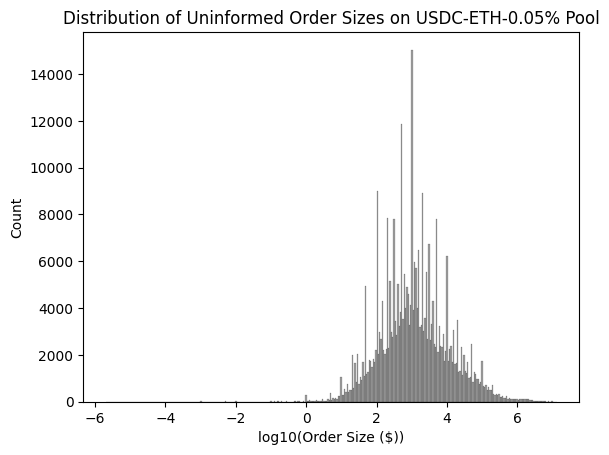

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(uninformed_swap_sizes_sorted_.apply(np.log10), color="grey");
plt.title(f"Distribution of Uninformed Order Sizes on {pool_name_}% Pool");
plt.xlabel("log10(Order Size ($))");

## What's the deal with routers and aggregators?

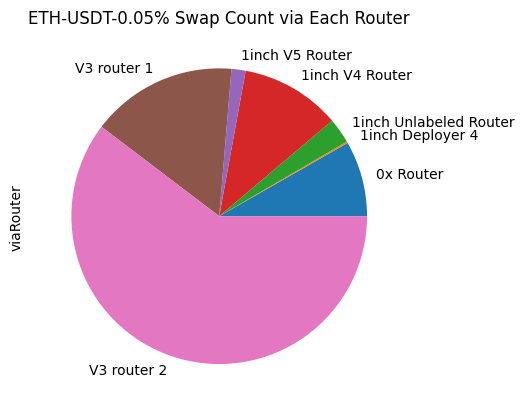

In [21]:
swap_data_.groupby("viaRouter")["viaRouter"].count().drop("0").plot.pie()
swap_data_.groupby("viaRouter")["viaRouter"].count().drop("0")
plt.title(f"{pool_name_}% Swap Count via Each Router");

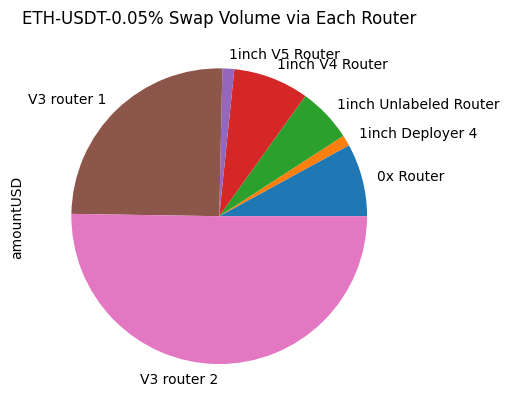

In [22]:
swap_data_.groupby("viaRouter")["amountUSD"].sum().drop("0").plot.pie()
# print(100*swap_data_.groupby("viaRouter")["amountUSD"].sum().drop("0")/swap_data_.amountUSD.sum())
plt.title(f"{pool_name_}% Swap Volume via Each Router");

In [23]:
total_volume_ = swap_data_.amountUSD.sum()

via_no_router_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()["0"].sum()

via_uni_router_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()[
    ["V3 router 1", "V3 router 2"]
].sum()

via_dex_aggregator_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()[
    ["0x Router", "1inch Deployer 4", "1inch Unlabeled Router", "1inch V4 Router", "1inch V5 Router"]
].sum()

print(f"Volume that comes from no known router/interface: {100*via_no_router_ / total_volume_:<.2f}%")
print(f"Volume that comes from the Uniswap Router: {100*via_uni_router_ / total_volume_:<.2f}%.")
print(f"Volume that comes from dex aggregators: {100*via_dex_aggregator_ / total_volume_:<.2f}%.")


Volume that comes from no known router/interface: 82.37%
Volume that comes from the Uniswap Router: 13.28%.
Volume that comes from dex aggregators: 4.35%.


In [84]:
# sandwich volume that comes from each interface
swap_txn_interfaces_ = {
    x.txnHash: x.viaRouter
    for _, x in swap_data_.iterrows()
}
sandwich_data_["meat_interface"] = sandwich_data_.meat_txn.apply(lambda x: swap_txn_interfaces_[x])
top_bun_interface_ = sandwich_data_.top_bun_txn.apply(lambda x: swap_txn_interfaces_[x])

# apply heuristic that frontruns don't use the uniswap router
# TODO add to data pipeline
sandwich_data_ = sandwich_data_[top_bun_interface_ == "0"]

In [85]:
sandwich_data_

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,top_bun_amount0,meat_amount0,bottom_bun_amount0,meat_volume,meat_interface,top_bun_interface,bottom_bun_interface,top_bun_volume,bottom_bun_volume
blockTimestamp,,,,,,,,,,,,,,,,,,
1.662972e+09,15519980,0x9f994be1c01e1657b632dc95b972b03be3b9a9015d7a...,0x08394c001e7c8fb5df94e4fc0da3bb64e141d5a24c3d...,0x1c5cbdf338a6cb24d2a04da4ebee06068e1b94695249...,-67.942899,73.328977,-141.271876,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,-1.505985e+05,-4.902785e+05,1.505985e+05,4.902785e+05,0,0,0,1.505985e+05,1.505985e+05
1.662979e+09,15520399,0xedc2c725f3153a796cb6d9bda2e1f5a079101b97b21e...,0x91da5f55556e7d79207ce180ed1fc7b0362fd0c84fd0...,0x1df90eae480208a9b023e0b45d97038829179cdcba4c...,1.792841,23.862294,-22.069453,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,0xdef1c0ded9bec7f1a1670819833240f027b25eff,-1.792635e+03,-1.449912e+02,1.608237e+03,1.449912e+02,0x Router,0,0,1.792635e+03,1.608237e+03
1.662986e+09,15520914,0x9ee2dea663a9328c05020b4a28f889eac0a976625b65...,0x1128a1772654f3e4b605cb2c7e8ab34c2a6878b87c16...,0x918c40332c5c30a837b4c8dd3d1288e4d5ebdc682cb5...,-4046.853398,349.912736,-4396.766134,0xe3e53f468d5658d217412203463246af76d7db37,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,3.341209e+06,9.100000e+05,-3.345256e+06,9.100000e+05,V3 router 2,0,0,3.341209e+06,3.345256e+06
1.662989e+09,15521062,0xff6559d59dfecc4ae76c79da400097f94803a1d54626...,0xf2bfddc5f64babd94885915259eb298cbdb15f70cc67...,0xab05132c43f48cefd36563558efd609227b2038f365e...,-41.598466,30.048652,-71.647118,0x1e8b3271425c8ae85a73674c5f3a08133dfdf076,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1.499860e+05,4.713813e+05,-1.500276e+05,4.713813e+05,V3 router 2,0,0,1.499860e+05,1.500276e+05
1.662991e+09,15521183,0xc15b682d5538b95a2781a45ad8c140382fbdbf0ffa77...,0x6310b88748abbf46c275059cc1a247958e92a9bb1812...,0x6833c62df3ea72a892e6f6759352c9c42a63d6bd4552...,-37331.777374,303.590428,-37635.367802,0xe3e53f468d5658d217412203463246af76d7db37,0xe592427a0aece92de3edee1f18e0157c05861564,4.096901e+06,3.159931e+06,-4.134233e+06,3.159931e+06,V3 router 1,0,0,4.096901e+06,4.134233e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.672540e+09,16308888,0x0aca261498924f40f7cc997ba6a2d990e807cef592c0...,0x8fe870b11d45ac236dac0dc7f1e55c9e106ea3df4ca9...,0xc52040f9ab125bcf8c7a2c6688550ec2278ab525cc74...,-241.093093,316.765181,-557.858274,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,6.473300e+05,8.963094e+05,-6.475710e+05,8.963094e+05,V3 router 2,0,0,6.473300e+05,6.475710e+05
1.672540e+09,16308918,0xc6ee5b8fdfccc51c59a5feb9bc755dc39c3e72499000...,0xdb6129ed7e3f5f4612fcf0f962dfb3582b7236a843b7...,0x9e3646e6f19b194bdeb43e269f93a198ccaac2396aaa...,3.764435,212.658182,-208.893747,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-3.772572e+03,-1.746800e+03,3.982632e+03,1.746800e+03,V3 router 2,0,0,3.772572e+03,3.982632e+03
1.672577e+09,16311970,0xe69b546feabdde291e476b326e1fde4c042c7a7ca9d6...,0xe1d1c58f4d1c8b989387acb5754b857182c83b3737dd...,0x6f5671102109148f23c64aee39f7b212086e70cb6211...,-828.511267,165.893726,-994.404993,0x05656db19ec9ff8dfb437475b3d76ca9a29e968f,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,2.766069e+06,7.227407e+05,-2.766898e+06,7.227407e+05,V3 router 2,0,0,2.766069e+06,2.766898e+06


Meat volume that comes from each interface (%)
meat_interface
0                         17.219103
0x Router                  2.714370
1inch Deployer 4           3.688700
1inch Unlabeled Router     4.849752
1inch V4 Router            3.552105
1inch V5 Router            1.020501
V3 router 1               10.461514
V3 router 2               56.493955
Name: meat_volume, dtype: float64


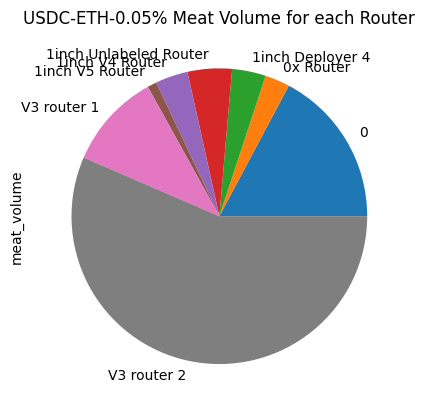

In [86]:
# which routers are creating the most sandwich meat volume?
sandwich_data_["meat_volume"] = sandwich_data_["meat_amount0"].abs()
sandwich_data_.groupby("meat_interface")["meat_volume"].sum().plot.pie()
x_ = 100*sandwich_data_.groupby("meat_interface")["meat_volume"].sum() / sandwich_data_.meat_volume.sum()
print(
    f"Meat volume that comes from each interface (%)\n{x_}"
)
plt.title(f"{pool_name_}% Meat Volume for each Router");
plt.show();

# # which routers are used by sandwichoors?
# sandwich_data_["top_bun_volume"] = sandwich_data_["top_bun_amount0"].abs() 
# sandwich_data_["bottom_bun_volume"] = sandwich_data_["bottom_bun_amount0"].abs()

# bun_interface_volumes_ = (
#     sandwich_data_.groupby("bottom_bun_interface")["bottom_bun_volume"].count()
#     + sandwich_data_.groupby("top_bun_interface")["top_bun_volume"].count()
# )
# bun_interface_volumes_.plot.pie()
# plt.title(f"{pool_name_}% Bun Number of Txns for each Router");
# plt.show();

In [67]:
sandwich_data_[sandwich_data_.bottom_bun_interface == "V3 router 2"]

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,top_bun_amount0,meat_amount0,bottom_bun_amount0,meat_volume,meat_interface,top_bun_interface,bottom_bun_interface,top_bun_volume,bottom_bun_volume
blockTimestamp,,,,,,,,,,,,,,,,,,
1.662964e+09,15519419,0xb165a4c89abf64e3508a2de641a539fbf2ca390423e8...,0xc282d41afa7d7a9e31573d394edfa46d6b68d3824b06...,0xa2c3ec9c55fe240527d4e6a37f2080ba2d67598c396b...,2.601747,11.059424,-8.457678,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,2687.460820,33959.201312,-46667.385465,33959.201312,0,V3 router 2,V3 router 2,2687.460820,46667.385465
1.662964e+09,15519434,0xd27a35ad1cb05cb44c36a5f694bfaa739d5baaf48367...,0xac2976febd748f499a99b95330ed66c42b8955f1412c...,0xa4eed504b693b3e690d0065e35960f8ea8dbe0273a6e...,0.138271,6.864437,-6.726166,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x0eae044f00b0af300500f090ea00027097d03000,-138.413598,-1318.984762,1281.558842,1318.984762,0,V3 router 2,V3 router 2,138.413598,1281.558842
1.662976e+09,15520195,0x1eedf726549e52cd4cf82395f1e3b5548ed64028d517...,0x848c18e45cd31010ff9e9195682642aa60911a08bfa9...,0xb3163394e4a07b0a717f3ec1badcc7b6c400d3e58b88...,2.979231,18.679289,-15.700058,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x1111111254fb6c44bac0bed2854e76f90643097d,3000.000000,1513.199359,-219.527328,1513.199359,1inch V4 Router,V3 router 2,V3 router 2,3000.000000,219.527328
1.662978e+09,15520339,0x95619f10a02020cd33073f194547abd5b8ee5bfb47df...,0x6fff7eaa18120afadf95c7668298659a54a0ac7a13c8...,0xa93393de87956971e013a0b95685186c796d382fc426...,33.089958,11.862553,21.227405,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xe592427a0aece92de3edee1f18e0157c05861564,-34767.037881,-1741.523522,1700.000000,1741.523522,V3 router 1,V3 router 2,V3 router 2,34767.037881,1700.000000
1.663007e+09,15522336,0xe231b8d7d34d8eb1d7900f384d32a73e4db02bca6e27...,0xaac6f857950447d072824c4efbb510dfb44d92cc3def...,0x1b097cb93a2641c9f3846f7741e97755259174766be5...,0.204875,18.785169,-18.580294,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xb21f51dc9f3067574946d1a530447d9037675cbc,-173.152528,-9018.665275,132718.390975,9018.665275,0,V3 router 2,V3 router 2,173.152528,132718.390975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.672546e+09,16309407,0x5ad1815bafb9cb9b93612d92e364267235deeba2c186...,0xaadb0b6190b31b94414631fc4473921dddcaf0fc4438...,0x0243183f9eb5f2cc06429d60fc02cc300e12f6f9ed70...,0.017901,9.573765,-9.555864,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x1111111254eeb25477b68fb85ed929f73a960582,-17.798543,-748.109694,7129.235425,748.109694,1inch V5 Router,V3 router 2,V3 router 2,17.798543,7129.235425
1.672593e+09,16313355,0x49251553c79eb66f2bd81763292cf52e3c586615a666...,0xdfb52cd1acce13c130db90b7761984809b1d3711b406...,0x86b6d7e8cc9057dfeec6c614d5896007188e4d649db7...,0.719795,9.247398,-8.527603,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x53222470cdcfb8081c0e3a50fd106f0d69e63f20,720.429316,500.000000,-1018.998227,500.000000,1inch Unlabeled Router,V3 router 2,V3 router 2,720.429316,1018.998227
1.672595e+09,16313505,0x269e824d49e8eaebda5c6647418f3b83882fda6a91f1...,0xd9213dee0d52f1c853fdf01dc3286072144310f101b5...,0xd15ee3e6e46c37a1d8da4b89fd26f0e408a3da8c95ae...,1.062373,10.500197,-9.437825,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x1111111254fb6c44bac0bed2854e76f90643097d,1064.373722,453.580000,-119.981591,453.580000,1inch V4 Router,V3 router 2,V3 router 2,1064.373722,119.981591


## Empirical Markout
What are the correlations between swaps and the eventual "true" price of that asset?

In [130]:

tmp_ = sandwich_data_.copy()
tmp_["logdifferential"] = (-sandwich_data_.top_bun_amount0 / sandwich_data_.bottom_bun_amount0).apply(np.log10).abs()
tmp_ = tmp_.sort_values("logdifferential")
x_ = (tmp_.top_bun_volume + tmp_.bottom_bun_volume).cumsum()
# 
tmp_.iloc[-300:]
# sandwich_data_

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,top_bun_amount0,meat_amount0,bottom_bun_amount0,meat_volume,meat_interface,top_bun_interface,bottom_bun_interface,top_bun_volume,bottom_bun_volume,logdifferential
blockTimestamp,,,,,,,,,,,,,,,,,,,
1.668372e+09,15963524,0x73000f946c20d01358e8bd329003eb24d3e8d26a86aa...,0x963d7749bfae13fa390d888c6d54d04f25824927b256...,0x7eccdafda288728b0ac7c5efacc87c2677c363e9adcb...,8.492369e+00,606.991204,-598.498835,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xc563c201fd129d0851ad03759f260c210c02780b,-9176.686812,-18096.743350,9509.610014,18096.743350,0,0,0,9176.686812,9509.610014,0.015477
1.664034e+09,15604160,0x8e755d74fa721e547c5f3719c04286eb9b44bfdf83b8...,0x4affeeb937f491e3f892bbf2f316f879c9db045f3bd8...,0x97e12c2a9293db138a793fe5d1c11b3feb186203016d...,8.580843e-01,33.470123,-32.612038,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-861.020350,-936.039536,892.491309,936.039536,V3 router 2,0,0,861.020350,892.491309,0.015591
1.669044e+09,16019250,0x3695c34907bba22b3d835f076e49153d8c3dbb4b8784...,0x3bf3750755133e8c48ae2d8ae1a87d36f98f3d3182df...,0x162ea88edd66370cf9a5129b1b1d186b7e05a0f48ed3...,2.610468e-01,35.278011,-35.016964,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x53222470cdcfb8081c0e3a50fd106f0d69e63f20,-263.612980,-2260.580380,273.539205,2260.580380,1inch Unlabeled Router,0,0,263.612980,273.539205,0.016053
1.669926e+09,16092291,0x59bb18077f28391980fd0253c9ef85ba9b8634bb2c3d...,0x07372c7f26c8fe0806552d21706bdfea5110f293ccdf...,0x77f7b0f15d9abf404bf1098e284ec8179d10706b06f8...,5.980216e+00,2291.362000,-2285.381784,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-35565.470472,-318466.735768,36932.548535,318466.735768,V3 router 2,0,0,35565.470472,36932.548535,0.016381
1.671176e+09,16195761,0xb0efbc346c6ec8bcc84187184510aae049f8d6fb1d9e...,0x59d24bae08e42cc42c791ba832fbb0da13d7de7d61cf...,0x0dd76a943afe7bd25183e98a4bdd93c45e99165641f2...,2.012220e-01,7.704105,-7.502883,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-201.160796,-255.196147,208.905476,255.196147,V3 router 2,0,0,201.160796,208.905476,0.016406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.666714e+09,15826177,0x2f7c1622156135f92e8cf588beb4b7428e48da0b0698...,0xc2527116ff9357d0d8357e91789f3e72815dc1a09cad...,0x1e5889edd08484cbd24e3c73ace31c3c92fa77633a49...,2.976498e+00,93.019831,-90.043333,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,0x1111111254fb6c44bac0bed2854e76f90643097d,-2036.888537,-1964.783816,342164.455830,1964.783816,1inch V4 Router,0,0,2036.888537,342164.455830,2.225268
1.664801e+09,15667682,0x9d611b0069ace12d3193e8556e746d9ede0c83f166ee...,0x35c6ff84904a3f3b66ebc95ad5831e4146f1d09641df...,0x4c26875353eee18bea826a53bacc7cdafd44082f3f65...,3.478879e-01,30.443471,-30.095583,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-322.534062,-492.715099,70976.035067,492.715099,V3 router 2,0,0,322.534062,70976.035067,2.342536
1.663785e+09,15583557,0x725001f74048d883ba963630dd4bde0ad845f13cdd9c...,0x7992113a9a636eb19d2817da34e7953e591aee0ce885...,0x2d38ddbf32b50b0ffe0ae1a7cdedddb9c060328c23d2...,3.910173e-01,32.953073,-32.562056,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-252.810787,-2990.946793,203000.214529,2990.946793,V3 router 2,0,0,252.810787,203000.214529,2.904701


In [139]:
100*(x_.iloc[-1] - x_.iloc[-60]) / (x_.iloc[-1])

0.16744034686531467

In [38]:
swap_data_

,blockTimestamp,blockNumber,logIndex,txnHash,origin,sender,gasUsed,gasPrice,amount0,amount1,...,viaRouter,price0After,price1After,informed,binance_price_token1_pre_block,binance_price_token1_1m_lag,binance_price_token1_5m_lag,binance_price_token1_10m_lag,binance_price_token1_30m_lag,binance_price_token1_60m_lag
txnIndex,,,,,,,,,,,,,,,,,,,,,
0,1.662962e+09,15519277,83,0xe16db8d1af0bf81d18b9c212307407ac1b64a940b955...,0x8993801b6afc20cfeb9d2c0a354e154cd1d79d80,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,209277,6017779198,-3000.000000,1.735737,...,V3 router 2,0.000578,1729.229797,False,1728.28,1727.94,1726.76,1726.82,1728.64,1734.22
1,1.662962e+09,15519278,146,0x61421fbd6ead19667a8fd67cbfd8dcfdf254e0ae14f9...,0x80ff59d3518ca8954c5c2a642fc3d553486a9bbd,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,291757,5543460742,-1296.271610,0.750000,...,V3 router 2,0.000578,1729.223724,False,1728.28,1727.94,1726.76,1726.82,1728.64,1734.22
2,1.662962e+09,15519279,29,0xa8da879d67c880386bd0e82c70484c95e6e429c5ecfe...,0x76681c1f04a475d6800debd9ce81254d88eb63b2,0xe592427a0aece92de3edee1f18e0157c05861564,466151,28932820445,-74468.735932,43.090726,...,V3 router 1,0.000578,1728.874881,False,1728.28,1727.94,1726.76,1726.82,1728.64,1734.22
3,1.662962e+09,15519280,16,0xb1457140fdc08c59196cbe6c4f7a39e77675f29017be...,0x56e67739838e179b1b6d419fc7e32d69f87e85a5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,606243,5923777493,-4389.120429,2.540000,...,V3 router 2,0.000578,1728.854322,False,1727.94,1728.80,1726.84,1726.15,1729.80,1735.93
4,1.662962e+09,15519280,153,0x2ba95df8762cb320d4a4f8cb527d2e08af48823e0980...,0x45cf3e4edfcd1b135ab60f0a5d121846263fda88,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,245959,5923777493,518.916120,-0.300000,...,V3 router 2,0.000578,1728.856751,False,1727.94,1728.80,1726.84,1726.15,1729.80,1735.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968775,1.672636e+09,16316855,181,0xef0d4d4366a22722c5c86aeba7dd8ad9e57fd5413fbd...,0x98cf20a04992eb33350c97391c185c1f575b8d30,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,307816,14339951433,286.634015,-0.238614,...,V3 router 2,0.000833,1200.643361,False,1202.18,1202.09,1202.29,1201.43,1201.90,1202.57
968776,1.672636e+09,16316856,14,0x2b219e0b369936bfe9066c89bb537456c01efaceab63...,0x66c31af0d98d68d023fe5e842537b047b24c4932,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,309333,14874290896,97213.658098,-80.927267,...,V3 router 2,0.000833,1200.649910,False,1202.18,1202.09,1202.29,1201.43,1201.90,1202.57
968777,1.672636e+09,16316856,72,0x7b2d65e9ce2b4fd2e01e46e74c28d2be4a16311971f5...,0xd7e1236c08731c3632519dcd1a581bfe6876a3b2,0x24902aa0cf0000a08c0ea0b003b0c0bf600000e0,328604,14087465896,-731.315087,0.609404,...,0,0.000833,1200.648970,True,1202.18,1202.09,1202.29,1201.43,1201.90,1202.57


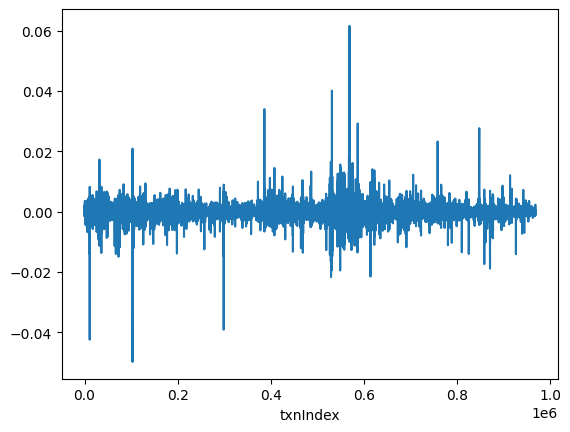

In [55]:
# assuming token1 is the asset whose price we're tracking
h_ = 10
swap_data_["delta_S"] = np.log( # approximate this as the price change post-block
    swap_data_[f"binance_price_token1_{lag_}m_lag"] / swap_data_["binance_price_token1_pre_block"]
) 
swap_data_.delta_S.plot();


In [56]:
informed_swaps_ =   swap_data_[swap_data_.informed]
uninformed_swaps_ = swap_data_[~swap_data_.informed]

informed_swaps_.groupby("boughtToken0")["delta_S"].mean()

boughtToken0
0   -0.000011
1   -0.000008
Name: delta_S, dtype: float64

In [88]:
df_sorted

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,top_bun_amount0,meat_amount0,bottom_bun_amount0,meat_volume,meat_interface,top_bun_interface,bottom_bun_interface,top_bun_volume,bottom_bun_volume
blockTimestamp,,,,,,,,,,,,,,,,,,
1.663579e+09,15566617,0x19d24d82608411951ffb09c70b877889f43d2636b627...,0xee1515658965886ee2ee78ed05660323467a68ed8064...,0xa1877dc2c598625ced7621e1485bd46728dc560fccc6...,0.101313,6.153293,-6.051980,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,9.800000e+01,2.000000e+01,-6.468687e+03,2.000000e+01,V3 router 2,0,0,9.800000e+01,6.468687e+03
1.671084e+09,16188186,0xf93ed1d53f55ab170fc8cd61ebdde3d89d7080184b95...,0xdde64bce8186d202a40e594da609772e039c10a9cd27...,0x018105df380aa0b9f7ad9c507d395bc4aa90c100ac6f...,0.146612,18.628217,-18.481605,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-1.465107e+02,-3.868992e+01,1.651695e+02,3.868992e+01,V3 router 2,0,0,1.465107e+02,1.651695e+02
1.671084e+09,16188138,0x588c4dbbec82244f841a51138f471e4b94c253f3bcce...,0x72cf416888f18d2b01dfff6fbaa81ba4024216bf59cb...,0xfcf75e050e8232df5fcf99a2f9f6f312706dc2c535d4...,0.111263,8.267346,-8.156083,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-1.111867e+02,-3.871250e+01,1.192859e+02,3.871250e+01,V3 router 2,0,0,1.111867e+02,1.192859e+02
1.663966e+09,15598519,0x62c8827bb9d2a651153f6534d9095682606e4243415c...,0xa8e79d7517108fd5ecef47291c2e276a3f2ef425621f...,0xf72f76db4322659373669d416bffe926a21abc3ae6e4...,40.804259,23.412914,17.391345,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,4.444400e+04,3.918203e+01,-1.294851e+04,3.918203e+01,V3 router 2,0,0,4.444400e+04,1.294851e+04
1.672325e+09,16291090,0xfa33617935e9915003f8497c9968c368d51c493b5e70...,0x8a72a5a45d31942f221154e1764cdeaf8976a83a5b76...,0xa45010bb78f6899698a69bf0d0e6229fde12e7065e8c...,1.052812,9.743394,-8.690581,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,-1.052108e+03,-4.813672e+01,1.062807e+03,4.813672e+01,V3 router 2,0,0,1.052108e+03,1.062807e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.665709e+09,15742936,0xd60f922d10a7df403c2aa79810f22dbaf5ee28b7b61c...,0x81f15445f523ba68de9f5c4024679158b195716b2e74...,0xaed023762dffab5f326a2b2e7d7827e6a90b2c2d5552...,-17141.634368,12.386406,-17154.020774,0xe8c060f8052e07423f71d445277c61ac5138a2e5,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1.622614e+06,4.540866e+06,-3.368171e+06,4.540866e+06,V3 router 2,0,0,1.622614e+06,3.368171e+06
1.668498e+09,15974038,0x63f522b71be386ad4a182d31bf44a4cffe499e38b245...,0xa26ab6187eeeaa9e2ebedb615e20185a2be9978370eb...,0x8fce72e97d278aca1e14156ed2996c413460c1c62292...,-21621.841826,27.929422,-21649.771248,0x00000000032962b51589768828ad878876299e14,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1.125087e+06,4.662239e+06,-1.146709e+06,4.662239e+06,V3 router 2,0,0,1.125087e+06,1.146709e+06
1.670334e+09,16126113,0x63d759a82ca17b581cc6f45071410689362104d576e1...,0x0e6c0cd20c8ea90a4207b34311403e2a5b072bc4dc3c...,0xe3ff88b34075c5a59f4bb22d590faab145f77f28d70c...,-14701.932542,190.425007,-14892.357549,0x05656db19ec9ff8dfb437475b3d76ca9a29e968f,0xe592427a0aece92de3edee1f18e0157c05861564,-9.028992e+06,-4.841410e+06,9.028992e+06,4.841410e+06,V3 router 1,0,0,9.028992e+06,9.028992e+06


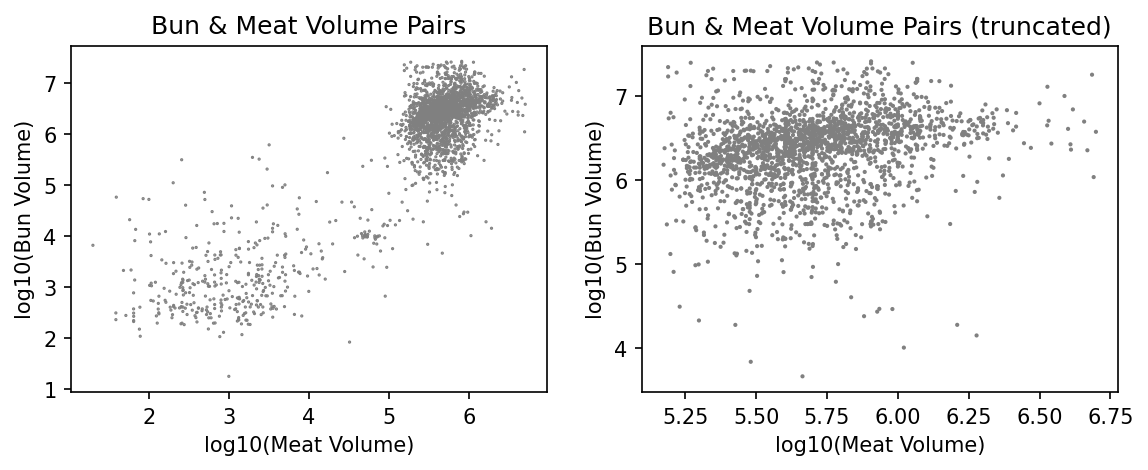

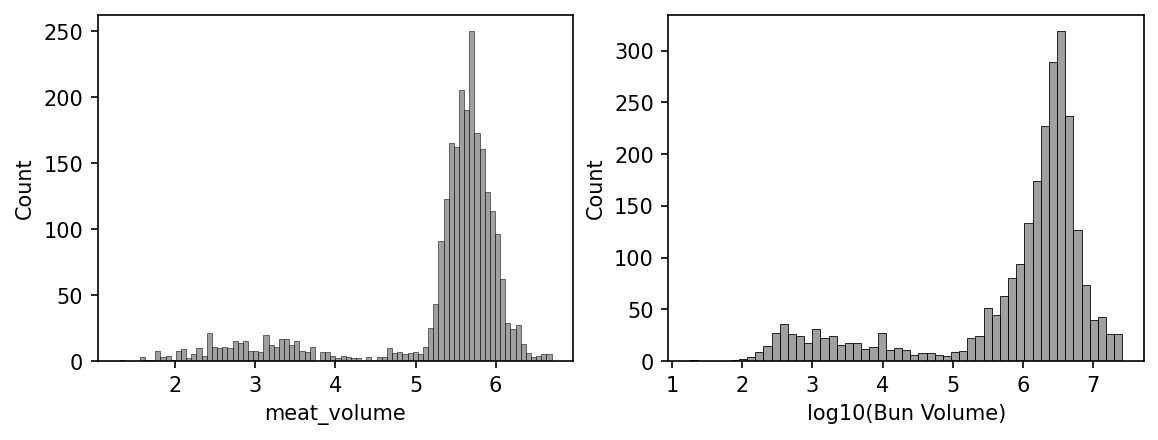

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_sorted = sandwich_data_.sort_values("meat_volume")
df_sorted["bun_volume"] = sandwich_data_.top_bun_volume + sandwich_data_.bottom_bun_volume

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(9, 3)
fig.set_dpi(150)

axs[0].scatter(
    df_sorted["meat_volume"].apply(np.log10),
    df_sorted["bun_volume"].apply(np.log10),
    color="grey",
    s=[.3]*len(df_sorted),
)
axs[0].set_xlabel("log10(Meat Volume)")
axs[0].set_ylabel("log10(Bun Volume)")
axs[0].set_title("Bun & Meat Volume Pairs")

largest_n_ = 2100
axs[1].scatter(
    df_sorted["meat_volume"].iloc[-largest_n_:].apply(np.log10),
    df_sorted["bun_volume"].iloc[-largest_n_:].apply(np.log10),
    color="grey",
    s=[1]*largest_n_,
)
axs[1].set_xlabel("log10(Meat Volume)")
axs[1].set_ylabel("log10(Bun Volume)")
axs[1].set_title("Bun & Meat Volume Pairs (truncated)")


fig, axs = plt.subplots(1, 2)
fig.set_size_inches(9, 3)
fig.set_dpi(150)

sns.histplot(np.log10(df_sorted["meat_volume"]), color="grey", ax=axs[0])
axs[1].set_xlabel("log10(Meat Volume)")

sns.histplot(np.log10(df_sorted["bun_volume"]), color="grey", ax=axs[1])
axs[1].set_xlabel("log10(Bun Volume)");


In [141]:
sandwich_data_["bun_volume"] = sandwich_data_.top_bun_volume + sandwich_data_.bottom_bun_volume

In [143]:
sandwich_volume_total_ = sandwich_data_.bun_volume.sum()

7407977645.114372

In [146]:
swap_data_.amount0.abs().sum()

44107505850.02885

In [148]:
100*7407977645.114372 / 44107505850.02885

16.795276682164808